In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.rc("font", family="Malgun Gothic")
plt.rcParams["axes.unicode_minus"] = False

name = input()

df = pd.read_csv("./pop.csv", encoding="euc-kr")
df.head(5)


,행정구역,2021년12월_계_총인구수,2021년12월_계_연령구간인구수,2021년12월_계_0세,2021년12월_계_1세,2021년12월_계_2세,2021년12월_계_3세,2021년12월_계_4세,2021년12월_계_5세,2021년12월_계_6세,...,2021년12월_계_91세,2021년12월_계_92세,2021년12월_계_93세,2021년12월_계_94세,2021년12월_계_95세,2021년12월_계_96세,2021년12월_계_97세,2021년12월_계_98세,2021년12월_계_99세,2021년12월_계_100세 이상
0,서울특별시 (1100000000),"9,509,458","9,509,458","43,410","44,904","48,900","51,445","55,879","62,987","67,581",...,"8,034","6,808","5,324","4,100","2,617","1,832","1,379","1,257",835,"1,643"
1,서울특별시 종로구 (1111000000),"144,683","144,683",484,463,564,564,645,761,851,...,178,145,110,102,71,45,31,23,30,32
2,서울특별시 종로구 청운효자동(1111051500),"11,978","11,978",40,49,57,56,74,76,95,...,10,10,10,7,6,4,3,1,4,2
3,서울특별시 종로구 사직동(1111053000),"9,372","9,372",40,24,43,44,51,65,79,...,14,18,7,7,7,8,3,3,1,1
4,서울특별시 종로구 삼청동(1111054000),"2,456","2,456",6,4,5,9,13,5,19,...,5,4,4,2,2,0,2,0,2,2


In [5]:
# 신도림동
specific: pd.Series = pd.to_numeric(df[df["행정구역"].str.contains(name)].iloc[0, 3:])
specific


2021년12월_계_0세         281
2021년12월_계_1세         274
2021년12월_계_2세         311
2021년12월_계_3세         296
2021년12월_계_4세         316
                     ... 
2021년12월_계_96세          8
2021년12월_계_97세          3
2021년12월_계_98세          6
2021년12월_계_99세          2
2021년12월_계_100세 이상      4
Name: 278, Length: 101, dtype: int64

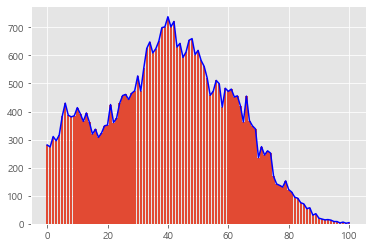

In [6]:
plt.style.use("ggplot")

x = np.arange(0, 101)
y = specific

plt.plot(x, y, color="blue")
plt.bar(x, y)
plt.show()
plt.close()


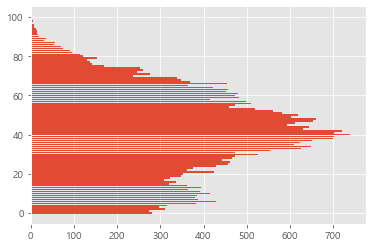

In [7]:
plt.barh(x, y)
plt.show()
plt.close()


In [8]:
df: pd.DataFrame = pd.read_csv("./pop_gender.csv", encoding="euc-kr")
series: pd.Series = df[df["행정구역"].str.contains(name)].iloc[0, 3:]

drop_axes = series.filter(like="인구수").axes
parsed = series.drop(drop_axes[0])

df_man: pd.Series = pd.to_numeric(parsed.filter(like="남"))
df_woman: pd.Series = pd.to_numeric(parsed.filter(like="여"))



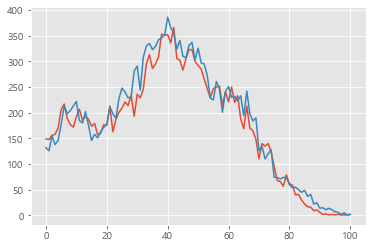

In [9]:
x = np.arange(0, 101)
y1, y2 = df_man, df_woman

plt.plot(x, y1, label="man")
plt.plot(x, y2, label="man")
plt.show()
plt.close()


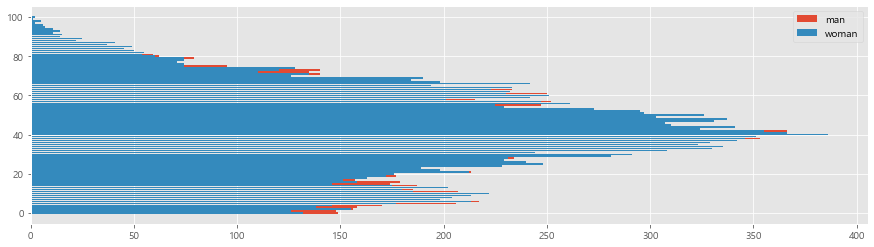

In [10]:
x = np.arange(0, 101)
y1, y2 = df_man, df_woman

plt.figure(figsize=(15, 4))

plt.barh(x, y1, label="man")
plt.barh(x, y2, label="woman")
plt.legend()
plt.show()
plt.close()


In [11]:
woman_minus = df_woman.subtract(df_woman).subtract(df_woman)


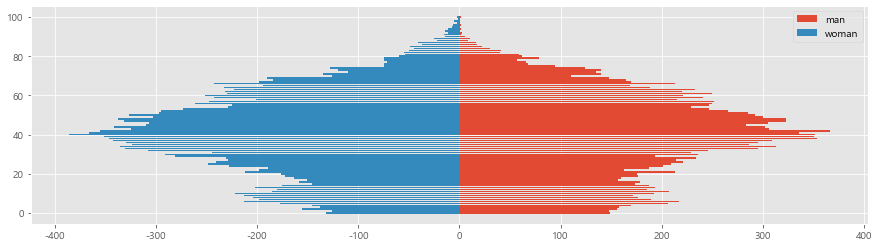

In [12]:
x = np.arange(0, 101)
y1, y2 = df_man, woman_minus

plt.figure(figsize=(15, 4))

plt.barh(x, y1, label="man")
plt.barh(x, y2, label="woman")
plt.legend()
plt.show()
plt.close()


([<matplotlib.patches.Wedge at 0x17f82f91cd0>,
 [Text(-1.0989243358357945, 0.04863439223284475, '남'),
  Text(1.0989243403892701, -0.04863428934412242, '녀')],
 [Text(-0.5994132740922515, 0.026527850308824406, '48.6%'),
  Text(0.5994132765759654, -0.026527794187703135, '51.4%')])

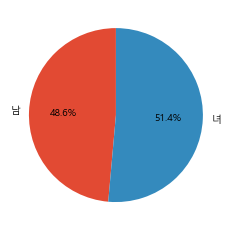

In [13]:
sum_man = df_man.sum()
sum_woman = df_woman.sum()

plt.pie([sum_man, sum_woman], labels=["남", "녀"], startangle=90, autopct="%.1f%%")



<BarContainer object of 101 artists>

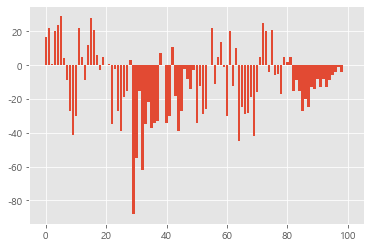

In [14]:
# man - womnan
x = np.arange(0, 101)

name_dict: dict[int, int] = {}
for idx, val in enumerate(df_man.axes[0]):
    name_dict[val] = idx

sub_m = pd.to_numeric(df_man).rename(name_dict)

name_dict: dict[int, int] = {}
for idx, val in enumerate(df_woman.axes[0]):
    name_dict[val] = idx

sub_w = pd.to_numeric(df_woman).rename(name_dict)

m_sub_w = sub_m.subtract(sub_w)
plt.bar(x, m_sub_w)



C:\Users\kdh\AppData\Local\Temp/ipykernel_19396/1765592724.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


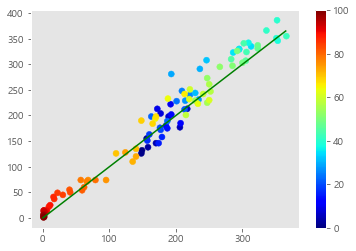

In [15]:
range_max = range(df_man.max())
plt.scatter(df_man, df_woman, c=range(0, 101), cmap="jet")

plt.grid(False)
plt.colorbar()

plt.plot(range_max, range_max, "g")

plt.show()

plt.close()
